## Configure the Path for Your Data and Label Files

In [41]:
%cd ..
%cd ..
%cd kitti_mmdetection

/Users/minkyun/Desktop/dev/python/kitti_mmdetection
/Users/minkyun/Desktop/dev/python
/Users/minkyun/Desktop/dev/python/kitti_mmdetection


In [47]:
import os

dir = "data/"
training_image_path = os.path.join(dir, "train/image/")
training_label_path = os.path.join(dir, "train/label/")
train_coco_format_path = os.path.join(dir, "train/coco/kitti_coco_format_train.json")
val_image_path = os.path.join(dir, "val/image/")
val_label_path = os.path.join(dir, "val/label/")
val_coco_format_path = os.path.join(dir, "val/coco/kitti_coco_format_val.json")

In [43]:
%pwd

'/Users/minkyun/Desktop/dev/python/kitti_mmdetection'

### Load Kitti image

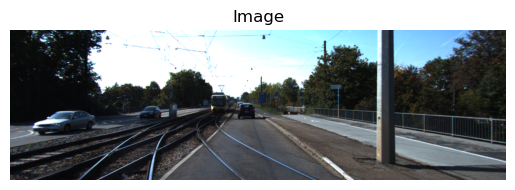

In [44]:
import os
import cv2
import matplotlib.pyplot as plt

if __name__ == "__main__":

    # Path to the training image directory
    # dir = "/data3/s4d/"
    # training_image_path = os.path.join(dir, "data_object_image_2/training/image_2/")

    # Load training images
    training_image_files = os.listdir(training_image_path)
    
    # Get the path of the first image file
    image_file = training_image_files[0]
    image_path = os.path.join(training_image_path, image_file)

    # Load the image
    image = cv2.imread(image_path)

    # Display the image on the screen
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Image')
    plt.axis('off')
    plt.show()


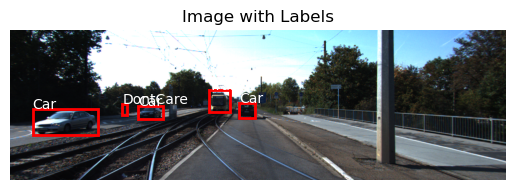

In [45]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def read_kitti_labels(label_path):
    with open(label_path, 'r') as f:
        lines = f.readlines()
    labels = [line.strip().split(' ') for line in lines]
    return labels

def draw_labels_on_image(image, labels):
    fig, ax = plt.subplots()
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    for label in labels:
        obj_type = label[0]
        x_min, y_min, x_max, y_max = map(float, label[4:8])
        width = x_max - x_min
        height = y_max - y_min

        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x_min, y_min, obj_type, color='w')

    plt.title('Image with Labels')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    # dir = "/data3/s4d/"
    # training_image_path = dir + "data_object_image_2/training/image_2/"
    # training_label_path = dir + "data_object_label_2/training/label_2/"

    # Load training images
    training_image_files = os.listdir(training_image_path)

    # Get the path of the first image file
    image_file = training_image_files[0]
    image_path = os.path.join(training_image_path, image_file)

    # Load the image
    image = cv2.imread(image_path)

    # Load label information
    label_file = os.path.join(training_label_path, image_file.replace(".png", ".txt"))
    labels = read_kitti_labels(label_file)

    # Add bounding boxes and labels to the image
    draw_labels_on_image(image, labels)


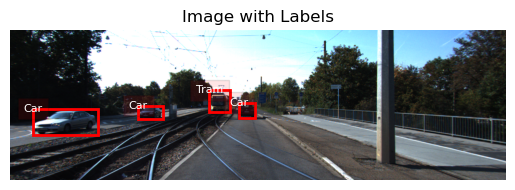

In [48]:
import os
import cv2
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_labels_on_image(image, coco_annotations):
    fig, ax = plt.subplots()
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    for annotation in coco_annotations:
        category_id = annotation['category_id']
        class_name = coco_categories[category_id]

        bbox = annotation['bbox']
        x_min, y_min, width, height = bbox

        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x_min, y_min, class_name, color='white', fontsize=8, va='center', ha='center',
                bbox=dict(facecolor='red', alpha=0.1))

    plt.title('Image with Labels')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    # dir = "/data3/s4d/"
    # training_image_path = dir + "data_object_image_2/training/image_2/"
    # coco_format_path = dir + "data_object_label_2/training/label_2/coco_format.json"

    # Load COCO format JSON data
    with open(train_coco_format_path, 'r') as json_file:
        coco_data = json.load(json_file)

    # Build a category mapping for COCO format
    coco_categories = {}
    for category in coco_data['categories']:
        coco_categories[category['id']] = category['name']

    # Load training images
    training_image_files = os.listdir(training_image_path)

    # Get the path of the first image file
    image_file = training_image_files[0]
    image_path = os.path.join(training_image_path, image_file)

    # Load the image
    image = cv2.imread(image_path)

    # Get COCO format label information for the image
    image_id = int(image_file.split('.')[0])
    coco_annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] == image_id]

    # Add bounding boxes and labels to the image
    draw_labels_on_image(image, coco_annotations)
